<a href="https://colab.research.google.com/github/nicholasrichers/dataviz-neuron/blob/master/Treinamento_Dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização de Dados em python

índice


Sugestões de gráficos para o curso: 

	•	Box Plot;
	•	Gráfico violino;
	•	HeatMap;
	•	HeatMap com cluster;
	•	Gráficos de distribuição;
	•	Gráfico de superfície;
	•	Histograma 2D;
	•	Gráfico de barras circular;
	•	Sankey/ Alluvial;
	•	Gráfico em Barras;
	•	Temporal em linha;
	•	Ternário;  





Cursos: Alura, DSA, Datacamp
- mpl
- seaborn
- plotly
- geopandas
- cufflinks / folium
- time series


Para esse treinamento é desejável que o aluno tenha conhecimentos básicos de linguagem de programação, de objetos python e também da biblioteca pandas.

# Importando o dataset

> Para esse treinamento, vamos usar uma base de dados de pedidos de empréstimo P2P do site [Lending Club](https://www.lendingclub.com/info/statistics.action), esse dataset já foi alvo de muitas análises no [kaggle](https://www.kaggle.com/wordsforthewise/lending-club) e até artigos acadêmicos.

Você poderá obter a versão original dos dados usando o trecho abaixo. 

```
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

!unzip LoanStats_2018Q4.csv.zip
```

Contudo, disponibilizei uma **versão limpa** desse dataset preparada para esse treinamento. Por fim há um [dicionário](https://github.com/nicholasrichers/dataviz-neuron/blob/master/dataset/LCDataDictionary.xlsx) explicando o significado de todas as colunas, mas adianto que o mesmo não será necessário, pois iremos explorar apenas a parte de visualização dos dados e um dataset relativamente grande como esse nos dará diversas opções.


In [ ]:
import pandas as pd
REPO_URL = 'https://raw.githubusercontent.com/nicholasrichers/dataviz-neuron/master/dataset/Lending_club_clean_200k.csv'

df = pd.read_csv(REPO_URL, nrows=10000)

São aproximadamente 150 mil pedidos de empréstimo, contendo 88 features referente ao tomador do empréstimo.

In [ ]:
df.tail()

,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,disbursement_method,dti,dti_joint,earliest_cr_line,emp_length,fico_range_low,grade,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,int_rate,loan_amnt,max_bal_bc,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,...,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_bal_joint,revol_util,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_mths_since_last_major_derog,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,tax_liens,term,tot_coll_amt,tot_hi_cred_lim,total_acc,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,loan_status
153640,4.0,FL,50.0,48000.0,5693.51,Individual,15929.0,27920.0,43.9,0.0,0.0,0.0,0.0,Cash,21.35,0.00,2006-02-01,0.0,680.0,C,MORTGAGE,98.0,f,1.0,2.0,2.0,15.02,10000.0,7920.0,150.0,3.0,3.0,5.0,226.0,226.0,127.0,4.0,3.0,194.0,4.0,...,8.0,0.0,0.0,3.0,15.0,2.0,1.0,1.0,1.0,2.0,3.0,100.0,25.0,0.0,0.0,debt_consolidation,21924.0,0.0,38.5,0.0,0.0,1954-12-01,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,36 months,0.0,292984.0,32.0,49800.0,0.0,13401.0,57000.0,Not Verified,Current
153641,0.0,FL,26.0,50000.0,118500.00,Joint App,3301.0,37685.0,20.0,0.0,0.0,0.0,0.0,DirectPay,19.11,21.17,1986-08-01,5.0,810.0,A,OWN,38.0,w,0.0,0.0,0.0,6.11,9600.0,4734.0,384.0,45.0,38.0,0.0,226.0,226.0,127.0,38.0,54.0,194.0,25.0,...,4.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,debt_consolidation,11169.0,26857.0,18.9,0.0,0.0,1999-02-01,645.0,2.0,0.0,15.0,20.0,3.0,55.2,0.0,36 months,0.0,90603.0,12.0,47100.0,1.0,31603.0,59000.0,Not Verified,Current
153642,1.0,CA,67.0,102720.0,5693.51,Individual,34499.0,6316.0,85.6,0.0,0.0,0.0,0.0,Cash,33.22,0.00,1993-01-01,11.0,695.0,D,MORTGAGE,56.0,w,0.0,1.0,0.0,18.94,16000.0,12954.0,307.0,25.0,14.0,4.0,226.0,226.0,127.0,14.0,25.0,194.0,3.0,...,5.0,0.0,0.0,0.0,11.0,0.0,3.0,0.0,1.0,0.0,0.0,100.0,83.3,0.0,0.0,debt_consolidation,37684.0,0.0,84.1,0.0,0.0,1954-12-01,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,60 months,0.0,429777.0,25.0,44000.0,1.0,64577.0,44800.0,Not Verified,Current
153643,4.0,HI,105.0,71400.0,5693.51,Individual,5559.0,4169.0,80.4,0.0,0.0,0.0,0.0,DirectPay,13.95,0.00,2007-08-01,2.0,665.0,C,RENT,111.0,f,0.0,0.0,0.0,14.47,16000.0,7040.0,132.0,11.0,11.0,0.0,226.0,226.0,127.0,15.0,11.0,194.0,16.0,...,4.0,0.0,0.0,1.0,22.0,0.0,18.0,0.0,2.0,1.0,2.0,100.0,75.0,0.0,0.0,debt_consolidation,17131.0,0.0,80.4,0.0,0.0,1954-12-01,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,36 months,0.0,116063.0,24.0,21300.0,0.0,94763.0,21300.0,Source Verified,Current
153644,5.0,MS,54.0,50000.0,140000.00,Joint App,34126.0,7808.0,61.9,0.0,0.0,0.0,0.0,Cash,70.38,34.80,2005-01-01,11.0,700.0,A,MORTGAGE,0.0,w,4.0,2.0,0.0,7.21,12800.0,4316.0,163.0,13.0,13.0,4.0,226.0,226.0,127.0,14.0,13.0,194.0,2.0,...,7.0,0.0,0.0,0.0,10.0,0.0,2.0,0.0,3.0,0.0,2.0,100.0,40.0,0.0,0.0,credit_card,14966.0,59699.0,54.2,0.0,0.0,2002-09-01,700.0,1.0,4.0,185.0,24.0,3.0,57.7,0.0,36 months,0.0,389965.0,37.0,20500.0,0.0,148665.0,27600.0,Verified,Current


# Conhecendo as bibliotecas gráficas

## Matplotlib

> Vamos começar esse treinamento pela biblioteca **matplotlib**, que é biblioteca gráfica padrão do python. Essa biblioteca é conhecida por ser bastante maleável, fácil de usar e com muitas opções de configuração, contudo fazer um **gráfico** complexo e **apresentável** pode ser uma tarefa **difícil**, ou demandar **muito código**. Mesmo assim é importante conhecermos as funções básicas, bem como sua sintaxe, porque em geral as bibliotecas mais robustas como o **Seaborn** (que veremos mais adiante), **usam** o **matplotlib** debaixo dos panos.

A primeira coisa que vamos fazer é importar a biblioteca com o alias "plt" para facilitar a escrita, também faremos uso do *magic_command* abaixo para renderizar as imagens diretamente no notebook.



```
%matplotlib inline
```



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Podemos obter nosso primeiro gráfico, que representa o *limite de crédito* de ccada cliente. Com apenas **1 linha** de código e passando os parâmetros desejados nos eixos X e Y.

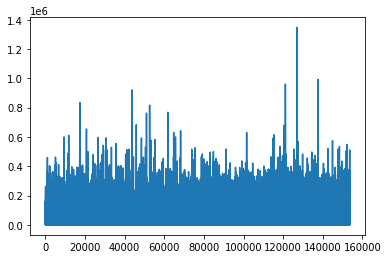

In [ ]:
plt.plot(df.index, df['total_il_high_credit_limit'])

Para uma visualização rápida, muitas vezes pode ser o suficiente, mas se precisarmos utilizá-lo em uma apresentação, precisamos melhorar esse gráfico.

Para facilitar o uso dos recursos do matplotlib, vamos primeiro inicializar o gráfico. Note que agora por padrão, temos duas variáveis

```
fig = "O arquivo criado em si" (imagine como .png, .svg ...)
ax = "Toda a informação contida na imagem"
```

Na prática, só iremos utilizar a variável `fig`, quando quisermos salvar a imagem. Para todo o resto utilizaremos a variável `ax`, que é uma abreviação de axis (eixo).



In [ ]:
%%capture
#Inicializando o gráfico
fig, ax = plt.subplots()

In [ ]:
print(type(fig))
print(type(ax))

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


Então a partir de agora usaremos esse padrão para as nossas imagens. Dessa forma poderemos usar outros recursos com mais facilidade.

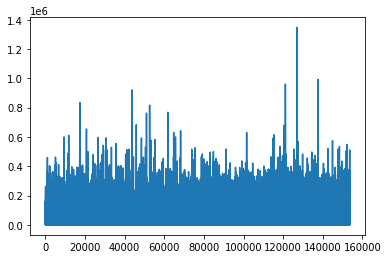

In [ ]:
fig, ax = plt.subplots()
ax.plot(df.index, df['total_il_high_credit_limit'])

Alguns recursos para melhorar a nossa imagem:

- Tamanho da figura
- Mudar a cor ([lista de cores](https://matplotlib.org/3.1.0/gallery/color/named_colors.html))
- Título
- Rótulo nos eixos
- Legenda ([Lista de posições para legenda](https://matplotlib.org/3.1.0/api/legend_api.html?highlight=legend#module-matplotlib.legend))


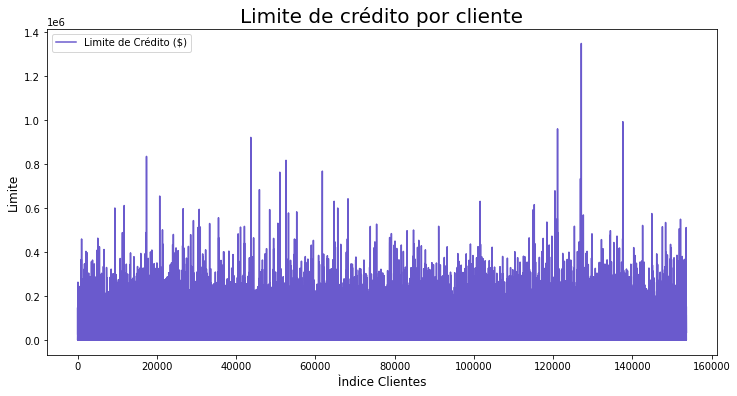

In [ ]:
#Ao inicializar a figura podemos configurar o tamanho
fig, ax = plt.subplots(figsize=(12,6))

#na linha referenta aos dados podemos definir a cor que desejamos usar
ax.plot(df.index, df['total_il_high_credit_limit'], color = "slateblue")

#Cria o titulo com o tamanho da fonte desejada
ax.set_title('Limite de crédito por cliente', fontsize=20)

#Cria a legenda para os eixos
ax.set_ylabel('Limite', fontsize=12)
ax.set_xlabel('Ìndice Clientes', fontsize=12)

#Ao criar uma legenda podemos escolher a posicão do quadro
ax.legend(['Limite de Crédito ($)'], loc = 'upper left', fontsize=10)

Como comentado anteriormente a variável `fig` serve para manipular o arquivo, asim podemos salva a imagem com o comando abaixo.

In [ ]:
fig.savefig("minha_imagem.png")

Obs: Definir todos esse parâmetros como tamanho de fonte é um tanto verboso, porém vou mostrar uma forma mais prática de definir parâmetros apenas uma vez.



---



---



> Outro tipo de gráfico muito **fácil** de criar, especialmente quando trabalhamos com **pandas**, são os **histogramas**. No gráfico abaixo, referente ao tempo em que o cliente está empregado, vemos que há uma grande proporção de desempregados

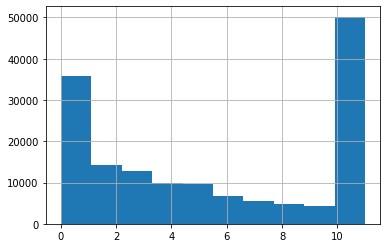

In [ ]:
df['emp_length'].hist(bins = 10)

Da maneira mostrada acima, estamos usando o pandas para chamar a [funçao](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) pyplot.hist() do matplotlib. Não há nenhum problema em fazer dessa forma, mas pode ser interessante comparar vários histogramas na mesma imagem.

(array([32875., 29965., 29173., 24111., 16133., 10033.,  5099.,  3399.,
         1566.,  1291.]),
 array([ 5.31 ,  7.878, 10.446, 13.014, 15.582, 18.15 , 20.718, 23.286,
        25.854, 28.422, 30.99 ]),
 <a list of 10 Patch objects>)

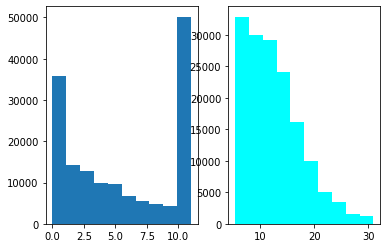

In [ ]:
#O parâmetro (1,2) indica uma dimensão 1x2, 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(1, 2)#, sharey=True, tight_layout=True)

#primeiro histograma usando ax1
ax1.hist(df['emp_length'], bins=10)

#segundo histograma usando ax2
ax2.hist(df['int_rate'], bins=10, color="cyan")

Temos vários problemas aqui nessa imagem como:


*   O **Eixo Y** dos histogramas estão desalinhados, levando a uma potencial má interpretação
*   A legenda dos histogramas está sobreposta.
*   Diversos valores na saída da célula




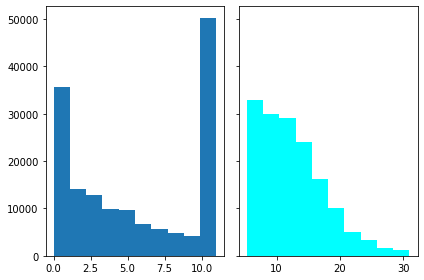

In [ ]:
#O parâmetro sharey (share Y), irá alinhar os eixos Y
#O parâmetro tight_layout irá adequar as informações entre os histogramas
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, tight_layout=True)

ax1.hist(df['emp_length'], bins=10)

#Note que se usado aqui, apenas o primeiro histograma será impresso
#plt.show() 

ax2.hist(df['int_rate'], bins=10,  color="cyan")

#O comando abaixo forcará a impressão do gráfico e impedirá outras saídas da célula
plt.show()

A configuração dos demais parâmetros como título e legendas dos eixos funciona de maneira análoga, manpulando as variáveis `ax1` e `ax2`. Além disso, com o comando abaixo podemos ver uma lista de estilos de gráfico para arrumar o fundo e as fontes usadas, atrav´s do comando `plt.style.use('ggplot')`


```
plt.style.available
```



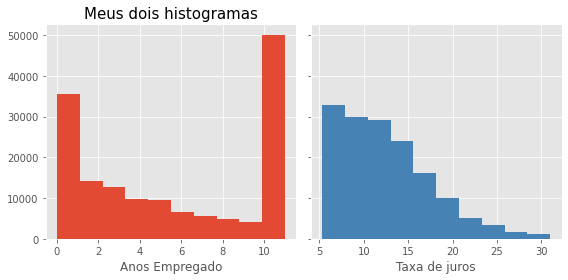

In [ ]:
#veja a lista completa com o comando acima
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(8,4))

#Cria o titulo
ax1.set_title('Meus dois histogramas', fontsize=15)

#Para qualquer configuração do histograma 1, devemos usar ax1
ax1.hist(df['emp_length'], bins=10)
ax1.set_xlabel('Anos Empregado', fontsize=12)


#Para qualquer configuração do histograma 2, devemos usar ax2
ax2.hist(df['int_rate'], bins=10,  color="steelblue")
ax2.set_xlabel('Taxa de juros', fontsize=12)

#O comando abaixo forcará a impressão do gráfico e impedirá outras saídas da célula
plt.show()

Perceba que o título ficou desalinhado com os histogramas, desa forma tivemos que recorrer a outro [recurso](https://stackoverflow.com/questions/40936729/matplotlib-title-spanning-two-or-any-number-of-subplot-columns). Vamos imprimir o título diretamente na imagem.



```
fig.suptitle("Meus dois histogramas", fontsize='x-large')
```



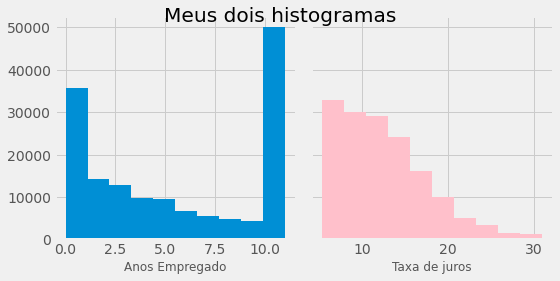

In [ ]:
#Outro estilo
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(8,4))


#Usamos o fig para imprimir o título direto no objeto imagem
fig.suptitle("Meus dois histogramas", fontsize='x-large')

#Para qualquer configuração do histograma 1, devemos usar ax1
ax1.hist(df['emp_length'], bins=10)
ax1.set_xlabel('Anos Empregado', fontsize=12)


#Para qualquer configuração do histograma 2, devemos usar ax2
ax2.hist(df['int_rate'], bins=10,  color="pink")
ax2.set_xlabel('Taxa de juros', fontsize=12)

#O comando abaixo forcará a impressão do gráfico e impedirá outras saídas da célula
plt.show()

> Voce pode criar um grid de imagens quiser, e de qualquer tipo assim:

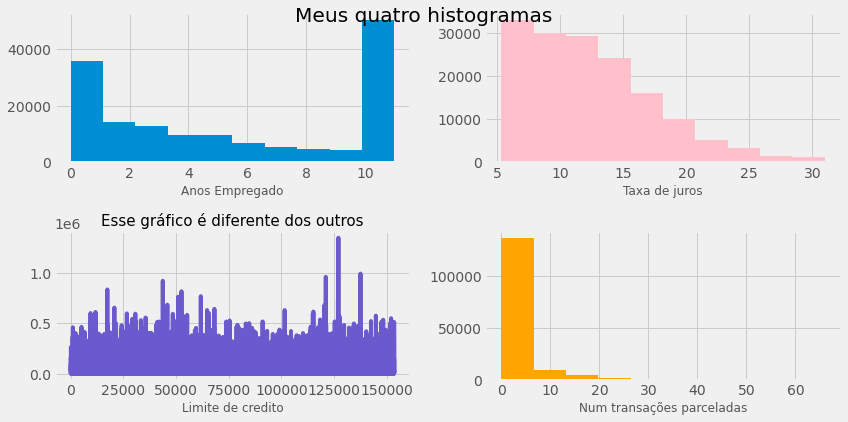

In [ ]:
#Outro estilo
plt.style.use('fivethirtyeight')
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,6))


fig.suptitle("Meus quatro histogramas", fontsize='x-large')

#Para qualquer configuração do histograma 1, devemos usar ax1
ax1.hist(df['emp_length'], bins=10)
ax1.set_xlabel('Anos Empregado', fontsize=12)


#Para qualquer configuração do histograma 2, devemos usar ax2
ax2.hist(df['int_rate'], bins=10,  color="pink")
ax2.set_xlabel('Taxa de juros', fontsize=12)


#Para qualquer configuração do histograma 3, devemos usar ax3
ax3.set_title('Esse gráfico é diferente dos outros', fontsize=15)
ax3.plot(df.index, df['total_il_high_credit_limit'], color = "slateblue")
ax3.set_xlabel('Limite de credito', fontsize=12)


#Para qualquer configuração do histograma 4, devemos usar ax4
ax4.hist(df['sec_app_open_acc'], bins=10,  color="orange")
ax4.set_xlabel('Num transações parceladas', fontsize=12)
plt.tight_layout()

#O comando abaixo forcará a impressão do gráfico e impedirá outras saídas da célula
plt.show()



---

---








> Criar vários histogramas simultâneos também pode ser bem prático em uma primeira análise.

Qtde de colunas numéricas: 76


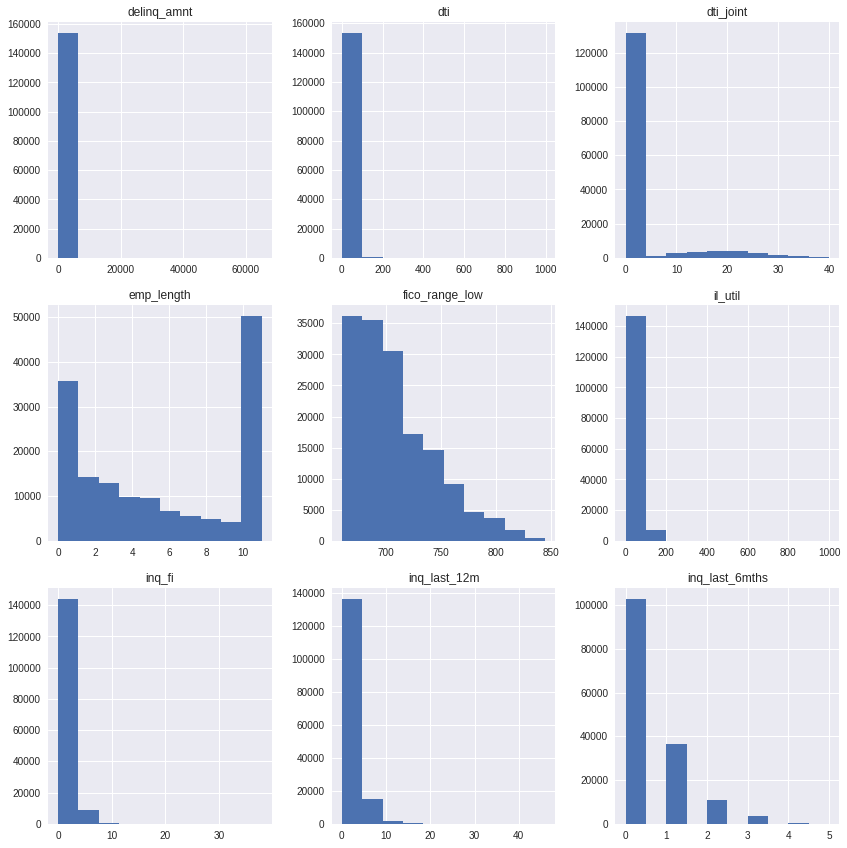

In [ ]:
#Outro estilo
plt.style.use('seaborn')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Selecionei 9 apenas por questao de espaço 
df[numeric_cols[10:19]].hist(figsize=(12,12))
print("Qtde de colunas numéricas:", len(numeric_cols))

#Para garantir o espaçamento
plt.tight_layout()
plt.show()



---


---




>  Vamos selecionar algumas variáveis categoricas para analisar. 

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['addr_state', 'application_type', 'disbursement_method',
       'earliest_cr_line', 'grade', 'home_ownership', 'initial_list_status',
       'purpose', 'sec_app_earliest_cr_line', 'term', 'verification_status',
       'loan_status'],
      dtype='object')

Temos as seguinte variáveis:



*   `grade`: Uma nota de A-G 
*   `home_ownership`: Se a sua casa é propria, alugada ou hipoteca
*   `loan_status`: Status do empréstimo (essa variável nesse caso é a que gostaríamos de prever em um eventual problema de machine learning)



In [ ]:
categorical_cols = ["grade", "home_ownership","loan_status" ]
df[categorical_cols].head()

,grade,home_ownership,loan_status
0,D,RENT,Current
1,B,OWN,Current
2,G,RENT,Current
3,D,MORTGAGE,Current
4,A,RENT,Fully Paid


Para melhorar a nossa visualização, vamos usar também um [mapa de cores](https://matplotlib.org/tutorials/colors/colormaps.html), para garantir que o conjunto de cores selecionado seja agradável. Perceba que o mapa será usado como parâmetro mais abaixo.


`.plot.bar(colormap=cmap)`

In [ ]:
cmap = plt.cm.viridis

Agora vamos explorar alguns recursos adicionais em conjunto com o pandas e criar  gráficos iterativamente.

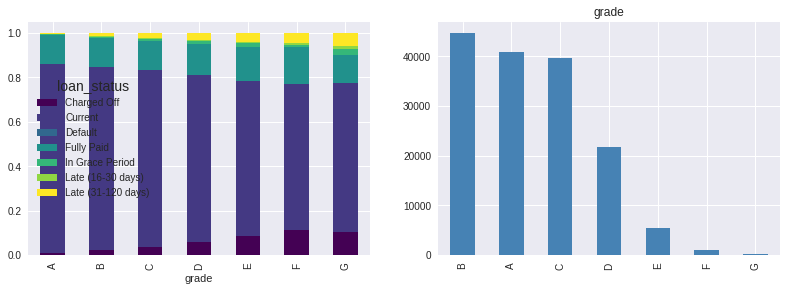

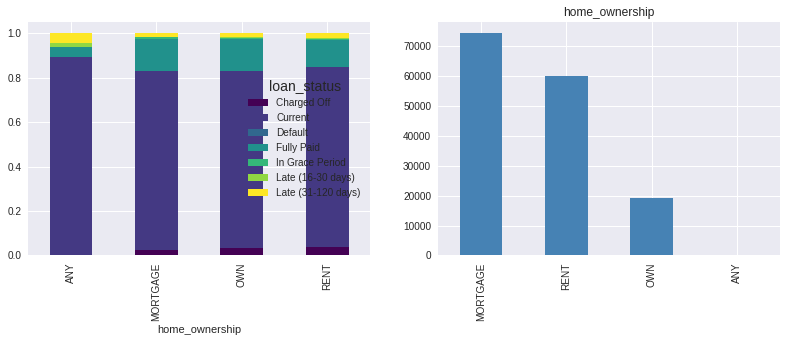

In [ ]:
for attr in ["grade", "home_ownership"]:

  #Cria Um gráfico 1X2 para attr
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

  #Agrupa o attr pelo status do empréstimo e retorna o count
  outcome_counts = df.groupby([attr, 'loan_status']).size().rename('count').reset_index()

  #Cria uma tabela com a frequencia de cada attr x loan_status
  by_outcome = outcome_counts.pivot(columns='loan_status', values='count', index=attr)

  # Plot das proporções (Stacked para empilhas as barras)
  by_outcome.div(by_outcome.sum(1), axis=0).plot.bar( stacked=True, ax=ax1, colormap=cmap);

  # Plot the counts
  df[attr].value_counts().plot.bar(ax=ax2, legend=False, color='steelblue');
  plt.title(attr);

Obs: A grande dificuldade em gerar esse gráfico esta na manipulação dos dados com pandas, e não com a biblioteca gráfica, contudo, outras bibliotecas como o **seaborn** oferecem opcoes que facilitam esse trabalho.





---



---





Uma outra opcao interessante é criar uma terceira dimensão para analisar o nosso gráfico. Nesse caso, além do tamanho do empréstimo e da receita anual, nos eixos X e Y, temos a taxa de juros representada pelo colormap.

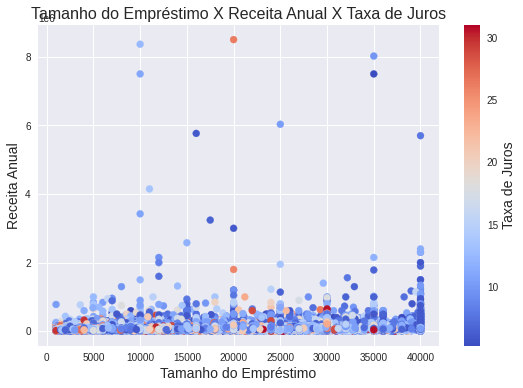

In [ ]:
fig, ax = plt.subplots()

# o parâmetro "c" define a variável da colorbar
cbar = ax.scatter(df['loan_amnt'], (df['annual_inc']),  c=df['int_rate'], cmap=plt.cm.coolwarm)


#Cria o titulo com o tamanho da fonte desejada
ax.set_title('Tamanho do Empréstimo X Receita Anual X Taxa de Juros', fontsize=16)

#Cria a legenda para os eixos
ax.set_ylabel('Receita Anual', fontsize=14)
ax.set_xlabel('Tamanho do Empréstimo', fontsize=14)

#Cria Legenda para o color bar
label_bar = plt.colorbar(cbar)
label_bar.set_label('Taxa de Juros',fontsize=14)


plt.show()

Devido a dimensão do nosso eixo Y, a análise visual ficou um pouco prejudicada, entao é comum transformarmos a coluna com a função do numpy `log1p` que significa log(1+x), para evitar divisões por zero. De toda forma, as taxas de juros mais altas (em vermelho), parecem bem distribuídas pelo gráfico, 

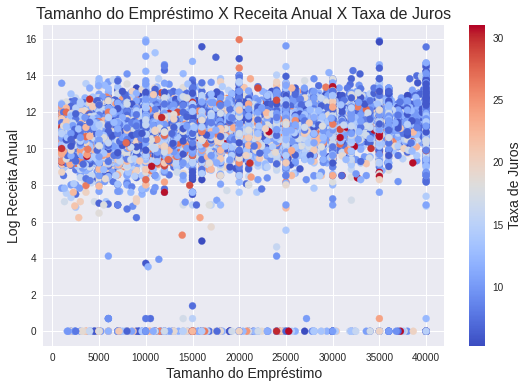

In [ ]:
import numpy as np
fig, ax = plt.subplots()

# o parâmetro "c" define a variável da colorbar
cbar = ax.scatter(df['loan_amnt'], np.log1p(df['annual_inc']),  c=df['int_rate'], cmap=plt.cm.coolwarm)


#Cria o titulo com o tamanho da fonte desejada
ax.set_title('Tamanho do Empréstimo X Receita Anual X Taxa de Juros', fontsize=16)

#Cria a legenda para os eixos
ax.set_ylabel('Log Receita Anual', fontsize=14)
ax.set_xlabel('Tamanho do Empréstimo', fontsize=14)

#Cria Legenda para o color bar
label_bar = plt.colorbar(cbar)
label_bar.set_label('Taxa de Juros',fontsize=14)

plt.show()

Por fim, há a opcao de configurar vários parâmetros apenas uma vez, logo no início do notebook. Vou deixar aqui algumas opçoes normalmente usadas.

In [ ]:
# load libraries and set plot parameters
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

Fontes:


Galerias de Gráficos:

[Documentação matplotlib](https://)




> **Obs: Consultar as galerias e a documentação é muito útil quando desejamos ter uma idéia para um gráfico, além de geralmente já possuírem um bom esquema de cores e etc. Assim, muitas vezes é cômodo usar essa abordagem, porém um gráfico nunca é igual ao outro, e se nao conhecermos os objetos básicos e a sintaxe apresentados aqui, teremos muita dificuldade em fazer uma modificação, mesmo que pequena e perdermos muito tempo com uma tarefa relativamente simples, então recomendo fazer uso das galerias, mas aprender bem a sintaxe da linguagem e sempre que necessário revisitar esse material.**



---



---



## Plotly

In [ ]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/700/1*t5J0wVtGJuarRinb6a0fxw.gif')

> A biblioteca Plotly é excelente para **visualização** de dados mais **complexos**, além de possuir muitas opçoes de **interatividade**.


Alguns contras:
- Como são muitos recursos, pode ser um pouco **lenta**.
- Alguns problemas de **compatibilidade** entre versões
- **Sintaxe** bem diferente das outras libs
- Se estiver na sua máquina local, de atenção ao uso de **memória ram**.



---



---



> Para agilizar a nossa análise vamos trablhar com um subconjunto dos nossos dados, porém fique a vontade caso queira trabalhar com o dataset completo. Bastando mudar `nrows=None`.

In [ ]:
import pandas as pd
REPO_URL = 'https://raw.githubusercontent.com/nicholasrichers/dataviz-neuron/master/dataset/Lending_club_clean_200k.csv'

df = pd.read_csv(REPO_URL, nrows=10000)



---



---



> **Importando a biblioteca**

Diferentes versões do plotly podem causar problemas na hora de exibir os gráficos, existem formas diferentes de importar a biblioteca, caso você tenha algum problema [esse post](https://stackoverflow.com/questions/54028965/how-to-display-plotly-outputs-in-google-collaboratory-notebooks) pode te ajudar.



In [ ]:
import plotly
plotly.__version__

'4.4.1'

Da mesma forma que nas outras libs, usaremos pandas para manipular os dados, e de uma forma análoga ao matplotlib com o uso de `fig` e `axis`, responsáveis pelo arquivo e conteúdo dos gráficos, precisamos importar as duas funções abaixo.


**Offline**, irá **exibir** e salvar o **gráfico** no formato desejado e **Graph_objs** que irá controlar o **conteúdo** do gráfico.





In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
#py.init_notebook_mode(connected=False)

> Assim como nas outras bibliotecas, criar um gráfico apenas para uma visualização rápida, é bastante simples, mas é importante ter atenção a algumas **convenções** de sintaxe



```
trace = ...

data = [trace]
py.iplot(data)
```


Essa estrutura será útil para usarmos recursos mais avançados da bilioteca



---



---



> **Criando o primeiro gráfico**

O gráfico abaixo, apesar de simples já nos dá a idéia do poder das opções de **interatividade** do *plotly*. Passe o mouse sobre o gráfico e explore a barra no canto superior direito para aprender como funciona.

In [ ]:
%%time
trace = go.Scatter(x = df.index, 
                   y = df['total_il_high_credit_limit'],
                   mode = 'markers')
data = [trace]
py.iplot(data)

CPU times: user 684 ms, sys: 85.3 ms, total: 770 ms
Wall time: 984 ms




---



---



> Quem está acostumado com as outras bibliotecas não terá dificuldade em compreender o que está sendo feito, contudo há uma diferença significativa na estrutura dessa linguagem, que usa **dicionários** como entrada para os parâmetros.


Perceba que os dados (data) do gráfico e o layout da imagem foram contruídos de manneira independente e passada como parâmetro no final da célula.



```
go.Figure(data=data, layout=layout)
```






In [ ]:
trace = go.Scatter(x = df.index,
                   y = df['total_il_high_credit_limit'],
                   mode = 'markers',
                   marker =  {'color' : '#e74c3c',
                              'line' : {'width': 1,
                                        'color': '#c0392b'}},
                   opacity=.8)

#dados da imagem
data = [trace]

#layout da imagem
layout = go.Layout(title='Limite de crédito por cliente',
                   yaxis={'title':'Limite de crédito'},
                   xaxis={'title': 'Índice cliente'})

#unindo tudo
fig = go.Figure(data=data, layout=layout)

#plotando a imagem
py.iplot(fig)



---



---



> Exitem muitas alternativas de confugiração para se explorar, e sempre vale a pena observar quais as opções disponíveis.

- Com o comando `help()`, retornará uma extensa documentação
- Utilizando `?` (no google colab), abrirá uma janela no lado direito com a documentação.

In [ ]:
#help(go.Scatter())
?go.Layout()

A leitura na página da [documentação oficial](https://plotly.com/python/reference/#layout) é sempre mais agradável, contudo não perdemos tempo procurando a pagina referente ao que estamos procurando



---



---



> **Gráfico de linha**

Se quesermos mais de um objeto no mesmo gráfico, basta criar mais de um objeto trace e concatenar na lista de dados (data).

In [ ]:
# Gráfico usando apenas marcadores
trace1 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [10, 9, 11, 8, 12],
                    mode = 'lines',
                    name = 'Gráfico com linhas tracejadas',
                    line = {'color': '#ee5253',
                            'dash': 'dash'})
# Gráfico de apenas linhas
trace2 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [11, 12, 13, 14, 15],
                    mode = 'lines',
                    name = 'Gráfico com linha pontilhada',
                    line = {'color': '#341f97',
                            'dash': 'dot'})
data = [trace1, trace2]
py.iplot(data)



---



---



> **Cores & gráfico boxplot**

Faz parte da construção de um bom gráfico, montar uma paleta de cores consistente, mas existem diversas ferramentas como o `colormap` que nos retorna uma lista de cores adequada, mas há opções para criarmos e visualizarmos a nossa própria paleta.


- Site com hexadecimal de diversas cores:
https://flatuicolors.com/


- Site para visualizar sua paleta de cores
https://projects.susielu.com/viz-palette


A partir dos 2 sites acima, criei uma lista de cores em hexadecimal numa lista.

In [ ]:
cores = ["#ffd700",
"#ffb14e",
"#fa8775",
"#ea5f94",
"#cd34b5",
"#9d02d7",
"#0000ff",
"#000000",
"#686de0"]

> Agora vamos construir um boxplot para entender se a taxa de juros `int_rate`, afeta no pagamento ou não do empréstimo. Vemos abaixo que as duas primeiras opções configuram que o pagamento está em dia ou ja foi quitado, e as demais que há problemas no pagamento.

In [ ]:
df['loan_status'].value_counts()

Current               7924
Fully Paid            1466
Charged Off            375
Late (31-120 days)     202
Late (16-30 days)       18
In Grace Period         14
Default                  1
Name: loan_status, dtype: int64

In [ ]:
#salvando as categorias numa lista
status_list = df['loan_status'].unique()

> Vamos criar um gráfico de maneira iterativa e com pouco código. Perceba que a nossa lista de cores e status são iteradas dentro do loop.

In [ ]:
data=[]
for cor, status in enumerate(status_list):

  # Gerando gráficos para cada status de pgto.
  trace = go.Box(y = df.loc[df['loan_status'] == status]['int_rate'],
                  name = status,
                  marker = {'color': cores[cor]})

  data.append(trace)


#Criando do layout da imagem
layout = go.Layout(title = 'Status do empréstimo por taxa de juros',
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Status'},
                   yaxis = {'title': 'Taxa de Juros'},
                   paper_bgcolor = 'rgb(243, 243, 243)', #também podemos usar RGB na imagem
                   plot_bgcolor = 'rgb(243, 243, 243)')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Podemos concluir a partir da mediana da taxa de juros (passe o mouse por cima do boxplot), que os empréstimos sem problemas de pgto (Current e Fully Paid), possuem em média taxas de juros mais baixas.

**Obs: Preceba que você pode ocultar alguns dos boxplots que não são úteis para a sua análise clicando na tabela do lado direito. Aproveite para ocultar a opção `Default`.**

In [ ]:
#Para ficar claro como dados são manipulados dentro do loop, mude a variável `== "status"`
df.loc[df['loan_status'] == "Current"]['int_rate']

0       20.39
1        9.92
2       30.79
3       21.85
5       20.39
        ...  
9994     7.34
9995     6.71
9997     5.31
9998     6.07
9999     5.31
Name: int_rate, Length: 7924, dtype: float64

> Há também a opção de plotar as amostras individualmente em pontos, com a opção `boxpoints`

In [ ]:
data=[]

good_loans = ["Current", "Fully Paid"]

for cor, status in enumerate(good_loans):

  # Gerando gráficos para cada status de pgto.
  trace = go.Box(y = df.loc[df['loan_status'] == status]['int_rate'],
                  name = status,
                  boxpoints = "all",
                  jitter = 0.2,
                  pointpos = -1.5,
                  marker = {'color': cores[cor]})

  data.append(trace)

layout = go.Layout(title = 'Status do empréstimo por taxa de juros',
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Status'},
                   yaxis = {'title': 'Taxa de Juros'},
                   paper_bgcolor = 'rgb(243, 243, 243)', #também podemos usar RGB na imagem
                   plot_bgcolor = 'rgb(243, 243, 243)')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



---



---



> **Gráficos de barra**

Podemos criar gráficos de barra muito facilmente, segundo os parâmetros abaixo.

In [ ]:
trace = go.Bar(x = ['Vôlei', 'Basquete', 'Futebol'],
               y = [100, 200, 300])
data = [trace]
py.iplot(data)

> Para duas **barras paraleas**, basta criar novamente um gráfico de barras, como vimos no gráfico de linhas. Porém como o nosso exemplo, como há várias *categorias* de `loan_status`, fica mais fácil trabalhar de maneira iterativa.

In [ ]:
data=[]

#lista com os ragrade de A-G
grades_list = sorted(df["grade"].unique())

#note que usamos a lista de status do gráfico de boxplot
for i, status in enumerate(status_list):

  # Gerando uma tabela provisória de cada grade
  df_status = df.loc[df['loan_status'] == status]


  # Gerando gráficos para cada status de pgto.
  trace = go.Bar(y = df_status.groupby(['grade']).count()['loan_status'],
                  x = grades_list,
                  name = status,
                  marker = {'color': cores[i]})
  
  data.append(trace)


fig = go.Figure(data=data)
py.iplot(fig)

Obs: Desmarque a opção current para mehorar a visualização.



---



---



> **Barras Empilhadas**

Podemos melhorar a nossa visualização com o uso de barras emplihadas com o opção stack, no layout do gráfico.

In [ ]:
data=[]

#lista com os ragrade de A-G
grades_list = sorted(df["grade"].unique())

#note que usamos a lista de status do gráfico de boxplot
for i, status in enumerate(status_list):

  # Gerando uma tabela provisória de cada grade
  df_status = df.loc[df['loan_status'] == status]


  # Gerando gráficos para cada status de pgto.
  trace = go.Bar(y = df_status.groupby(['grade']).count()['loan_status'],
                  x = grades_list,
                  name = status,
                  marker = {'color': cores[i]})
  
  data.append(trace)


layout = go.Layout(title = 'Gráfico de barras empilhadas do <a href=\'https://plot.ly/\'>Plotly</a>',
                   xaxis = {'title': 'Grade'},
                   yaxis = {'title': 'Quantidade'},
                   barmode = 'stack') #Atenção a opção "stack"
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Obs: Interaja com as opções na barra do lado direito, passando por cima do mouse e vendo as opções.



---



---



MAPA

In [ ]:
df.head() #addr_state 

,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,disbursement_method,dti,dti_joint,earliest_cr_line,emp_length,fico_range_low,grade,home_ownership,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,int_rate,loan_amnt,max_bal_bc,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,...,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_bal_joint,revol_util,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_mths_since_last_major_derog,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,tax_liens,term,tot_coll_amt,tot_hi_cred_lim,total_acc,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim,verification_status,loan_status
0,3.0,OK,58.0,50000.0,5693.51,Individual,3869.0,384.0,23.2,1.0,0.0,1.0,0.0,Cash,21.80,0.00,2009-01-01,8.0,665.0,D,RENT,51.0,w,9.0,5.0,0.0,20.39,5000.0,85.0,13.0,11.0,11.0,0.0,9.0,9.0,127.0,16.0,11.0,194.0,2.0,...,2.0,0.0,1.0,1.0,5.0,0.0,2.0,0.0,1.0,1.0,2.0,77.8,0.0,0.0,0.0,other,116.0,0.0,23.2,0.0,0.0,1954-12-01,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,36 months,0.0,33430.0,18.0,500.0,0.0,27820.0,500.0,Verified,Current
1,15.0,FL,51.0,196000.0,5693.51,Individual,31468.0,7368.0,74.1,0.0,0.0,0.0,0.0,Cash,18.29,0.00,1998-07-01,2.0,700.0,B,OWN,59.0,w,4.0,7.0,0.0,9.92,15000.0,10495.0,236.0,4.0,4.0,5.0,65.0,226.0,127.0,6.0,11.0,194.0,6.0,...,10.0,0.0,0.0,6.0,19.0,4.0,3.0,2.0,2.0,4.0,12.0,98.0,75.0,0.0,0.0,debt_consolidation,24243.0,0.0,46.3,0.0,0.0,1954-12-01,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,36 months,0.0,605228.0,53.0,28500.0,1.0,147178.0,52400.0,Source Verified,Current
2,5.0,NH,84.0,44000.0,81000.00,Joint App,8397.0,632.0,66.7,0.0,0.0,1.0,0.0,Cash,43.97,31.94,2007-07-01,0.0,665.0,G,RENT,89.0,w,8.0,10.0,2.0,30.79,11200.0,1011.0,128.0,5.0,5.0,0.0,6.0,70.0,127.0,8.0,34.0,35.0,0.0,...,3.0,0.0,0.0,2.0,8.0,1.0,4.0,1.0,4.0,1.0,1.0,71.4,0.0,0.0,0.0,medical,1526.0,7101.0,24.6,0.0,2.0,2005-02-01,610.0,3.0,1.0,37.0,14.0,11.0,80.0,0.0,60 months,0.0,80367.0,14.0,1900.0,1.0,74167.0,6200.0,Not Verified,Current
3,2.0,AL,90.0,65000.0,5693.51,Individual,10685.0,63.0,98.1,0.0,0.0,1.0,0.0,Cash,12.89,0.00,1995-03-01,11.0,665.0,D,MORTGAGE,82.0,w,4.0,3.0,1.0,21.85,25000.0,3237.0,126.0,72.0,16.0,2.0,22.0,23.0,127.0,16.0,126.0,194.0,0.0,...,3.0,0.0,1.0,0.0,7.0,0.0,2.0,0.0,2.0,0.0,0.0,75.0,100.0,0.0,0.0,debt_consolidation,8657.0,0.0,98.4,0.0,0.0,1954-12-01,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,60 months,0.0,101234.0,16.0,3300.0,3.0,10220.0,8800.0,Source Verified,Current
4,3.0,WA,1.0,52000.0,5693.51,Individual,25099.0,30359.0,0.5,0.0,0.0,0.0,0.0,Cash,0.58,0.00,1998-01-01,9.0,760.0,A,RENT,0.0,w,1.0,2.0,0.0,7.34,3000.0,141.0,242.0,18.0,7.0,4.0,26.0,226.0,127.0,7.0,18.0,194.0,7.0,...,1.0,0.0,0.0,1.0,7.0,0.0,0.0,1.0,2.0,0.0,1.0,96.7,0.0,0.0,0.0,major_purchase,141.0,0.0,0.5,0.0,0.0,1954-12-01,540.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,36 months,0.0,191216.0,30.0,30500.0,2.0,0.0,31000.0,Source Verified,Fully Paid


In [ ]:
# o que eu quero é cloropleth

trace = go.Scattergeo(
                     locationmode = 'USA-states',
                     lon = df['lon'],
                     lat = df['lat'],
                     text = df['name'] + '- População: ' + df['pop'].astype(str),
                     marker = dict(
                            size = df['pop']/5000,
                            color = '#e74c3c',
                            line = {'width': 0.5, 
                                    'color': '#2c3e50'},
                            sizemode = 'area')
                    )
data = [trace]
layout = go.Layout(
        title = '<b>População americana em 2014</b>',
        titlefont = {'family': 'Arial',
                     'size': 24},
        geo =  {'scope': 'usa',
                'projection': {'type': 'albers usa'},
                'showland': True,
                'landcolor': '#2ecc71',
                'showlakes': True,
                'lakecolor': '#3498db',
                'subunitwidth': 1,
                'subunitcolor': "rgb(255, 255, 255)"
                })
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)




---



---



Fontes:

https://medium.com/plotly/introducing-plotly-express-808df010143d

https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b

https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners#INTRODUCTION



---



---



## GeoPandas

# Rascunho

> Uma maneira interessante de observar todo o seu dataset de uma vez é com a biblioteca **pandas_profiling**. Infelizmente o **pandas_profiling** não funciona com a versao 1.0 do pandas, e está bastante instável, mas você pode fazer o downgrade através do comando (seguido de um `Reset Runtime`). Contudo esse downgrade irá gerar alguns warnings dentro de outras partes do relatório, de qualquer forma, salvei o resutado do pandas profiling em html, pronto para download nesse link

```
!pip install pandas==0.25
```



In [ ]:
print(pd.__version__)

0.25.0


In [ ]:
from pandas_profiling import ProfileReport
#prof = ProfileReport(df)


Com esse comando você irá baixar o arquivo para os "Files" do google colab (olhe no seu lado esquerdo).

In [ ]:
#prof.to_file(outputfile='output_pandas_profiling.html')